In [ ]:
import pandas as pd
import numpy as np
#------------------------------------------------------------------------------------------------------------------------
# Import all libraries needed for classifiers and ensemble models
#------------------------------------------------------------------------------------------------------------------------
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Load the train and test datasets

train = pd.read_csv(r"Tonmoy_Ensemble_train.csv")

In [ ]:
# printing column names

print(train.columns.values)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'deposit']


In [ ]:
# check data types

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31662 entries, 0 to 31661
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31662 non-null  int64 
 1   job        31662 non-null  object
 2   marital    31662 non-null  object
 3   education  31662 non-null  object
 4   default    31662 non-null  object
 5   balance    31662 non-null  int64 
 6   housing    31662 non-null  object
 7   loan       31662 non-null  object
 8   contact    31662 non-null  object
 9   day        31662 non-null  int64 
 10  month      31662 non-null  object
 11  duration   31662 non-null  int64 
 12  campaign   31662 non-null  int64 
 13  pdays      31662 non-null  int64 
 14  previous   31662 non-null  int64 
 15  poutcome   31662 non-null  object
 16  deposit    31662 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB
None


In [ ]:
#  count the number of records with missing values

print("*****In the train set*****")
print(train.isna().sum())

*****In the train set*****
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


no     27900
yes     3762
Name: deposit, dtype: int64
no     0.881182
yes    0.118818
Name: deposit, dtype: float64


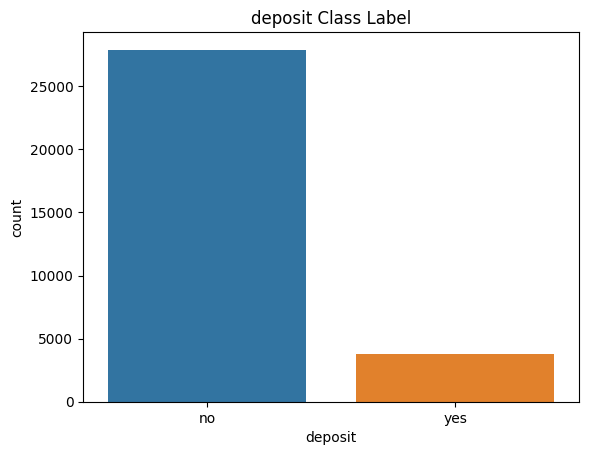

In [ ]:
# 3.1 chart that shows the number of records per Yes and No value of Deposit variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='deposit', data=train)
plt.title('deposit Class Label')

# printing the counts of each category of "deposit" variable

print(train['deposit'].value_counts())

# print the proportions of each category of "deposit" variable

print(train['deposit'].value_counts(normalize=True))

In [ ]:
# Count the occurrences of each class
class_counts = train['deposit'].value_counts()

# Calculate the prior probabilities
prior_probabilities = class_counts / len(train)

# Display the prior probabilities
print(prior_probabilities)


no     0.881182
yes    0.118818
Name: deposit, dtype: float64


In [ ]:
# Accuracy for prediction based on prior probabilities
prior_accuracy = max(prior_probabilities)
print("Accuracy for Prediction Based on Prior Probabilities:", prior_accuracy)

Accuracy for Prediction Based on Prior Probabilities: 0.8811824900511654


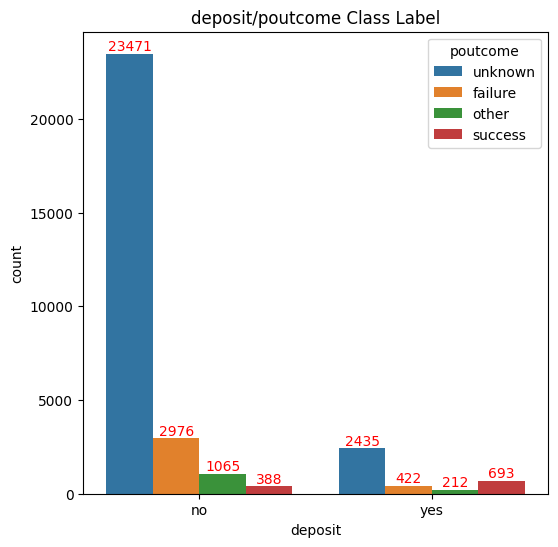

In [ ]:
# 3.2

plt.figure(figsize=(6,6))
sns.countplot(x='deposit', hue='poutcome', data=train)
plt.title('deposit/poutcome Class Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

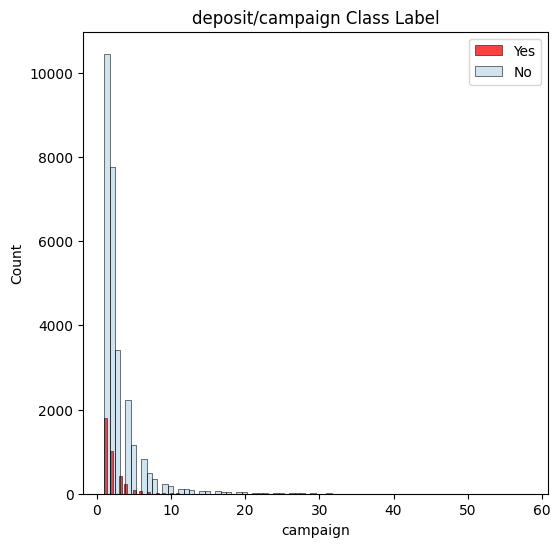

In [ ]:
#3.3

plt.figure(figsize=(6,6))
plt.title('deposit/campaign Class Label')
sns.histplot(train[train['deposit']=='yes']['campaign'], label='Yes', color='r', bins = 80)
sns.histplot(train[train['deposit']=='no']['campaign'], label='No', alpha = 0.2, bins = 80)
plt.legend()
plt.show()

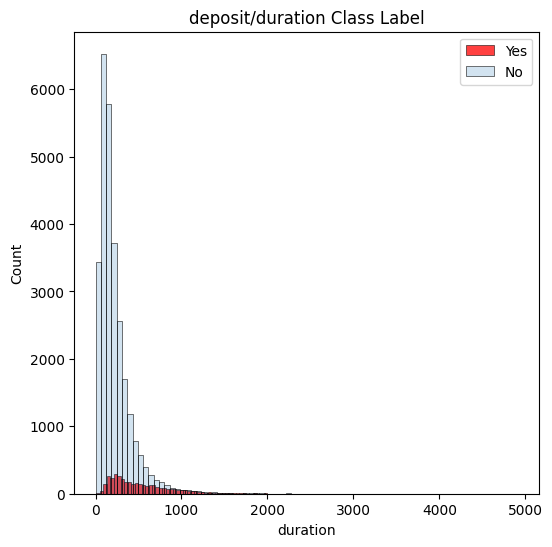

In [ ]:
#3.4

plt.figure(figsize=(6,6))
plt.title('deposit/duration Class Label')
sns.histplot(train[train['deposit']=='yes']['duration'], label='Yes', color='r', bins = 80)
sns.histplot(train[train['deposit']=='no']['duration'], label='No', alpha = 0.2, bins = 80)
plt.legend()
plt.show()

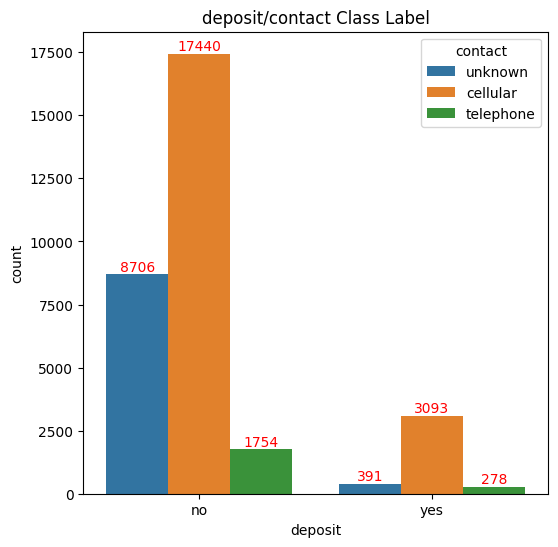

In [ ]:
#3.5


plt.figure(figsize=(6,6))
sns.countplot(x='deposit', hue='contact', data=train)
plt.title('deposit/contact Class Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

<ipython-input-13-274b64e2c89e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['deposit']=='yes']['age'], label='Yes')
<ipython-input-13-274b64e2c89e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['deposit']=='no']['age'], label='No')


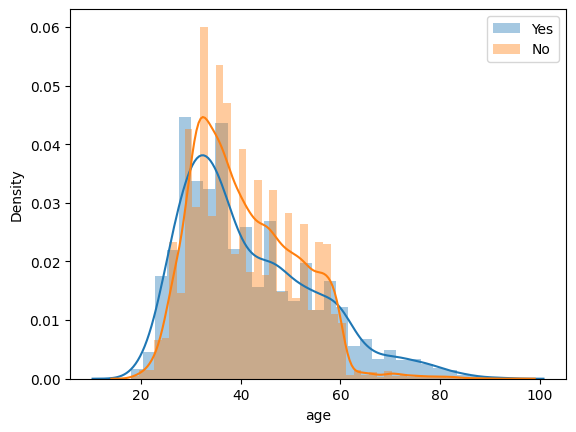

In [ ]:
#3.6

sns.distplot(train[train['deposit']=='yes']['age'], label='Yes')
sns.distplot(train[train['deposit']=='no']['age'], label='No')
plt.legend()
plt.show()

In [ ]:
# 4.1 Transform all the categorical variables with textual values

ObjList = train.select_dtypes(include = 'object').columns
print (ObjList)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in ObjList:
    train[feat] = le.fit_transform(train[feat].astype(str))

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31662 entries, 0 to 31661
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        31662 non-null  int64
 1   job        31662 non-null  int64
 2   marital    31662 non-null  int64
 3   education  31662 non-null  int64
 4   default    31662 non-null  int64
 5   balance    31662 non-null  int64
 6   housing    31662 non-null  int64
 7   loan       31662 non-null  int64
 8   contact    31662 non-null  int64
 9   day        31662 non-null  int64
 10  month      31662 non-null  int64
 11  duration   31662 non-null  int64
 12  campaign   31662 non-null  int64
 13  pdays      31662 non-null  int64
 14  previous   31662 non-null  int64
 15  poutcome   31662 non-null  int64
 16  deposit    31662 non-null  int64
dtypes: int64(17)
memory usage: 4.1 MB
None


In [ ]:
# 4.2 Split variables into independent variables and target variables


X = train.drop(["deposit"], axis=1)
y = train.deposit

In [ ]:
# spliting data into training (70%) and test sets (30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=222)

In [ ]:
#4.3


# 1. GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)

# Evaluate accuracy on test set
print("gnb: ", accuracy_score(y_test, preds))

gnb:  0.8462996104853142


In [ ]:
# 2. LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

# Evaluate accuracy
print("lr: ", accuracy_score(y_test, preds))

lr:  0.8912517107063902


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 3.	DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

# Evaluate accuracy
print("dt: ", accuracy_score(y_test, preds))

dt:  0.8736709127276555


In [ ]:
# 4.	KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

# Evaluate accuracy
print("knn: ", accuracy_score(y_test, preds))

knn:  0.8776713338246132


In [ ]:
# 5. MLPClassifier(hidden_layer_sizes=(5,2,2))
mlp = MLPClassifier(hidden_layer_sizes=(5,2,2))
mlp.fit(X_train, y_train)
preds = mlp.predict(X_test)

# Evaluate accuracy
print("mlp: ", accuracy_score(y_test, preds))

mlp:  0.8851458048215601


In [ ]:
# 4.4.1

from sklearn.metrics import classification_report

print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8408
           1       0.00      0.00      0.00      1091

    accuracy                           0.89      9499
   macro avg       0.44      0.50      0.47      9499
weighted avg       0.78      0.89      0.83      9499



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = dt.predict(X_test)

# Generate a classification report
report = classification_report(y_test, preds)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8408
           1       0.45      0.46      0.46      1091

    accuracy                           0.87      9499
   macro avg       0.69      0.69      0.69      9499
weighted avg       0.87      0.87      0.87      9499



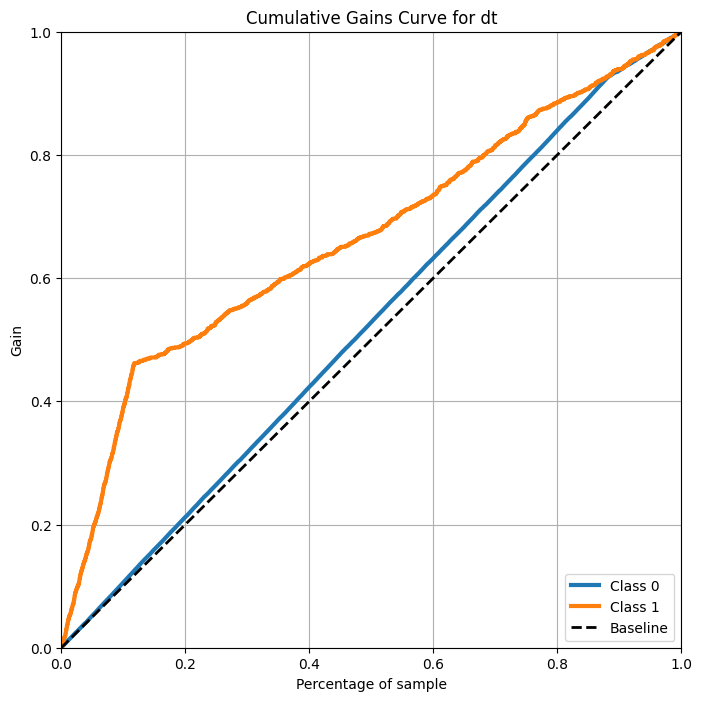

In [ ]:
# 4.4.2

predicted_probas = dt.predict_proba(X_test)

import matplotlib.pyplot as plt
%pip install scikit-plot
import scikitplot as skplt

# show cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8),
                                   title="Cumulative Gains Curve for dt")
plt.show()

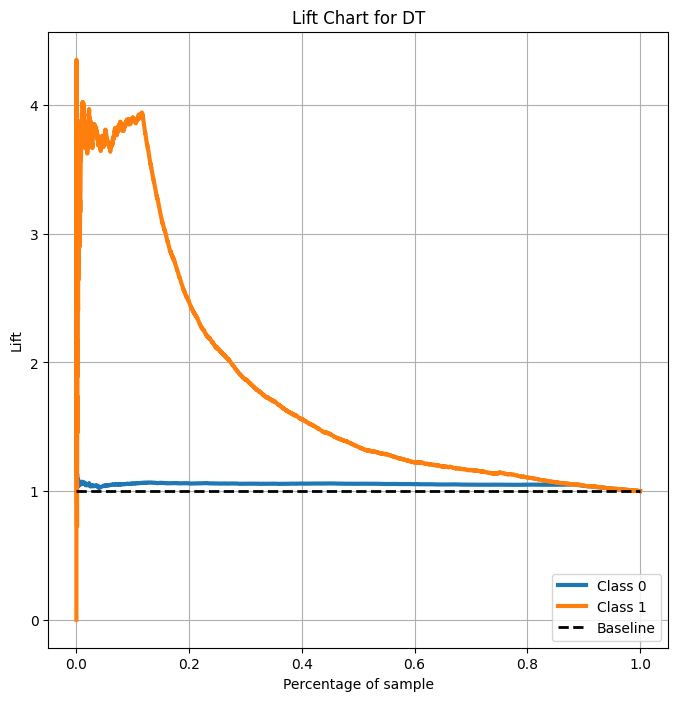

In [ ]:
# Lift Chart

skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8), title="Lift Chart for DT")
plt.show()

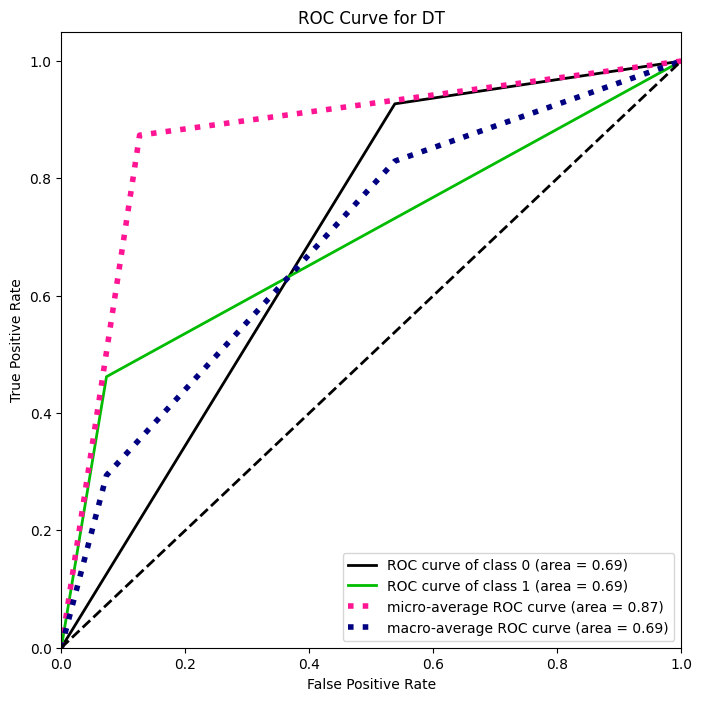

In [ ]:
# ROC curve

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for DT")
plt.show()

In [ ]:
# 4.5.1

seed = 7
num_trees = 100
cart = DecisionTreeClassifier()

bagging = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=seed)

# Train our classifier on train set
bagging.fit(X_train, y_train)

# Make predictions on test set
preds = bagging.predict(X_test)

print("bagging: ", accuracy_score(y_test, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


bagging:  0.903779345194231


In [ ]:
from sklearn.metrics import classification_report

print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8408
           1       0.61      0.44      0.51      1091

    accuracy                           0.90      9499
   macro avg       0.77      0.70      0.73      9499
weighted avg       0.89      0.90      0.90      9499



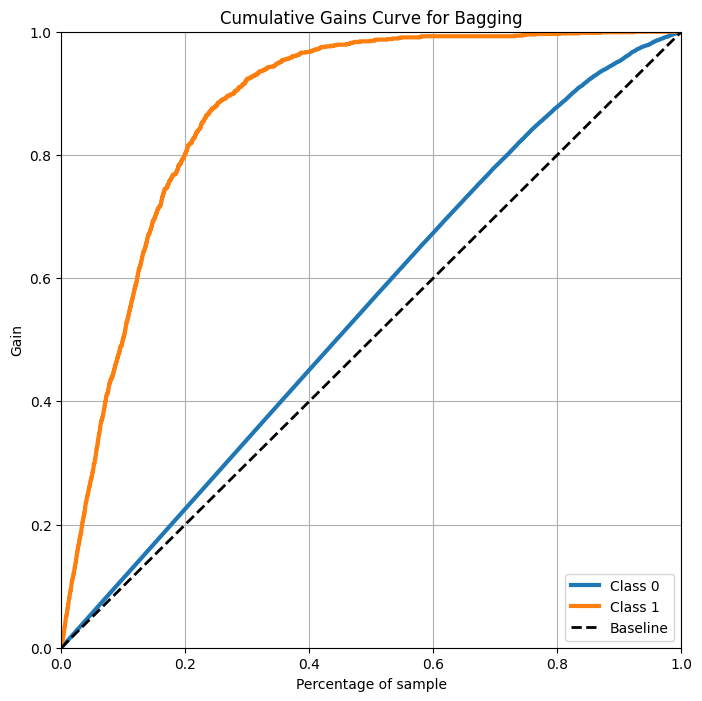

In [ ]:
# 4.5.2

predicted_probas = bagging.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8),
                                   title="Cumulative Gains Curve for Bagging")
plt.show()

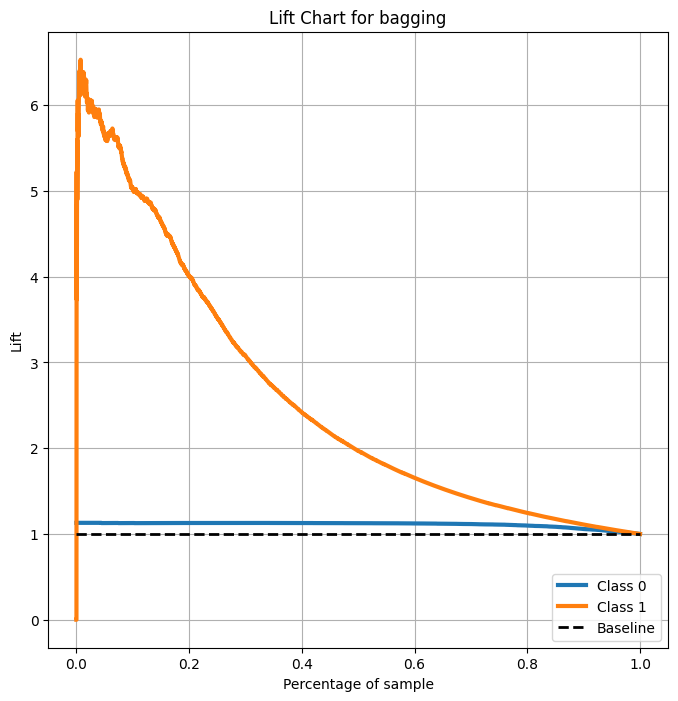

In [ ]:
# Lift Chart

skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8), title="Lift Chart for bagging")
plt.show()

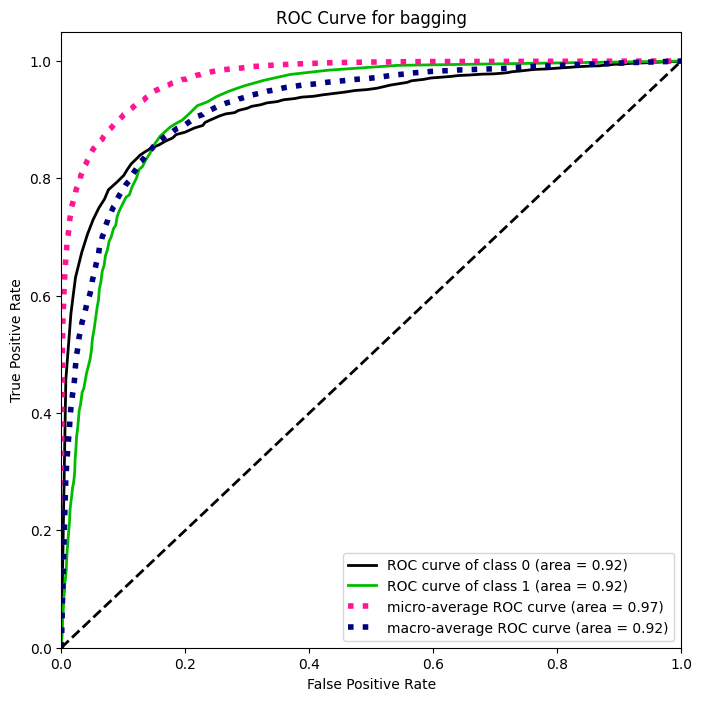

In [ ]:
# ROC Curve

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for bagging")
plt.show()

In [ ]:
# 4.6.1

adaboost = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

adaboost.fit(X_train, y_train)
preds = adaboost.predict(X_test)

print("boosting: ", accuracy_score(y_test, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


boosting:  0.8716707021791767


In [ ]:
from sklearn.metrics import classification_report
predicted_probas = adaboost.predict_proba(X_test)

print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8408
           1       0.44      0.47      0.45      1091

    accuracy                           0.87      9499
   macro avg       0.69      0.69      0.69      9499
weighted avg       0.87      0.87      0.87      9499



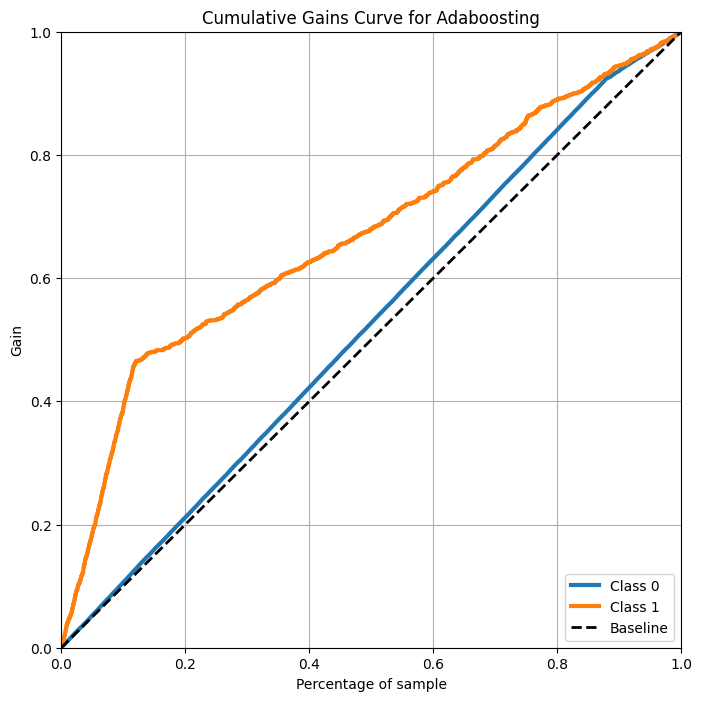

In [ ]:
# 4.6.2 Cumulative lift chart

skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8),
                                   title="Cumulative Gains Curve for Adaboosting")
plt.show()

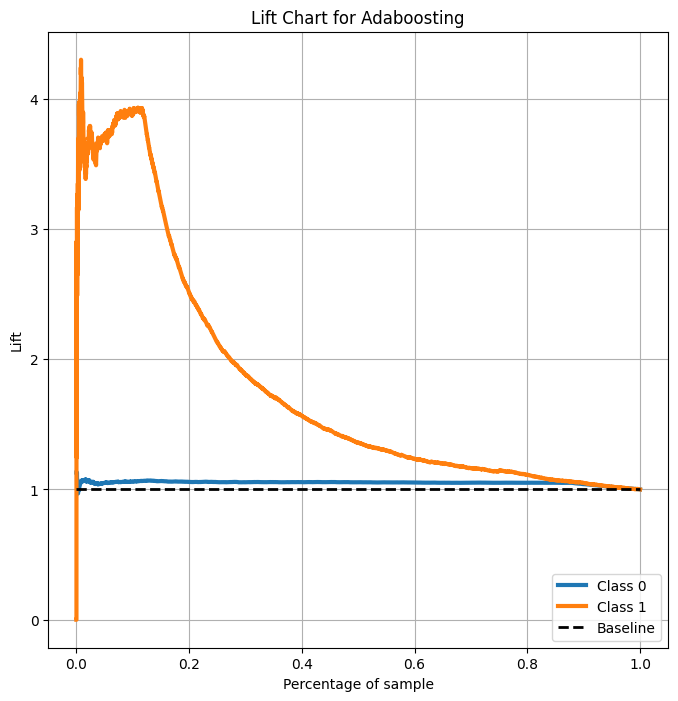

In [ ]:
# Lift Chart

skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8), title="Lift Chart for Adaboosting")
plt.show()

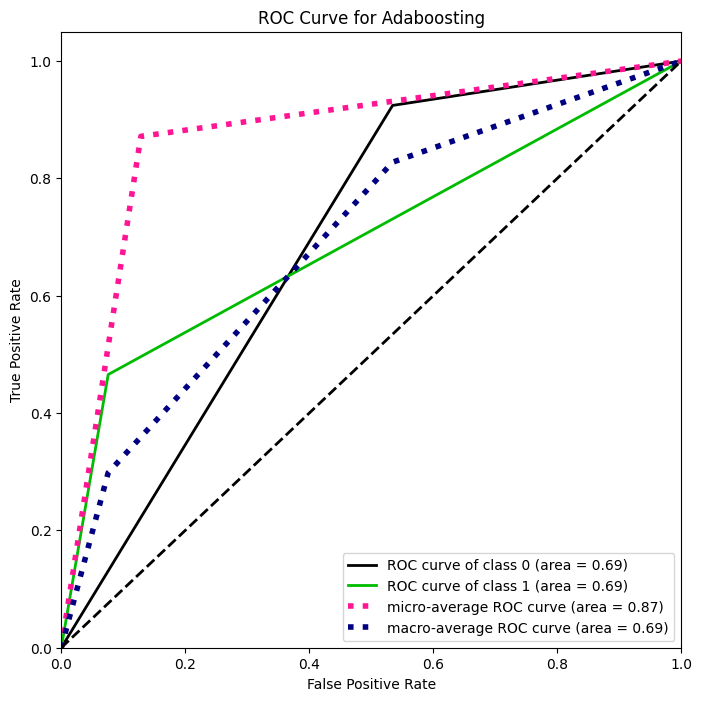

In [ ]:
# ROC Curve

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for Adaboosting")
plt.show()

In [ ]:
# 4.7.1	Initialize and train a Random Forest Ensemble

max_features = 5
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print("randomforest: ", accuracy_score(y_test, preds))

randomforest:  0.905147910306348


In [ ]:
from sklearn.metrics import classification_report
predicted_probas = rf.predict_proba(X_test)

print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8408
           1       0.63      0.41      0.50      1091

    accuracy                           0.91      9499
   macro avg       0.78      0.69      0.72      9499
weighted avg       0.89      0.91      0.90      9499



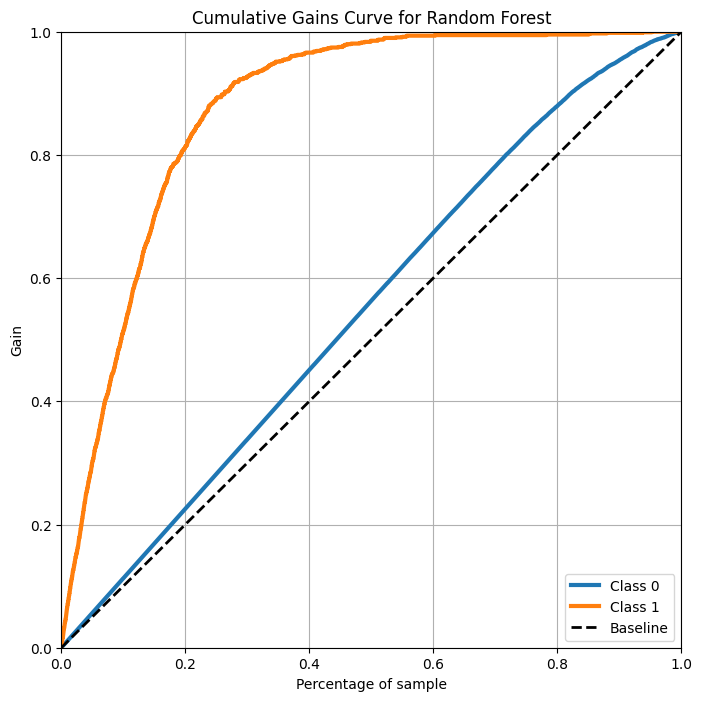

In [ ]:
# 4.7.2 Cumulative Lift Chart

skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8),
                                   title="Cumulative Gains Curve for Random Forest")
plt.show()

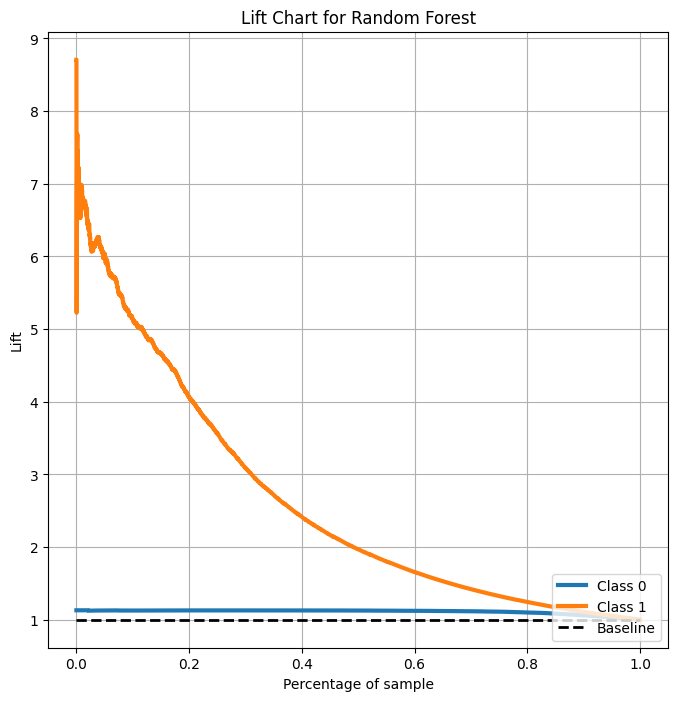

In [ ]:
# Lift Chart

skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8), title="Lift Chart for Random Forest")
plt.show()

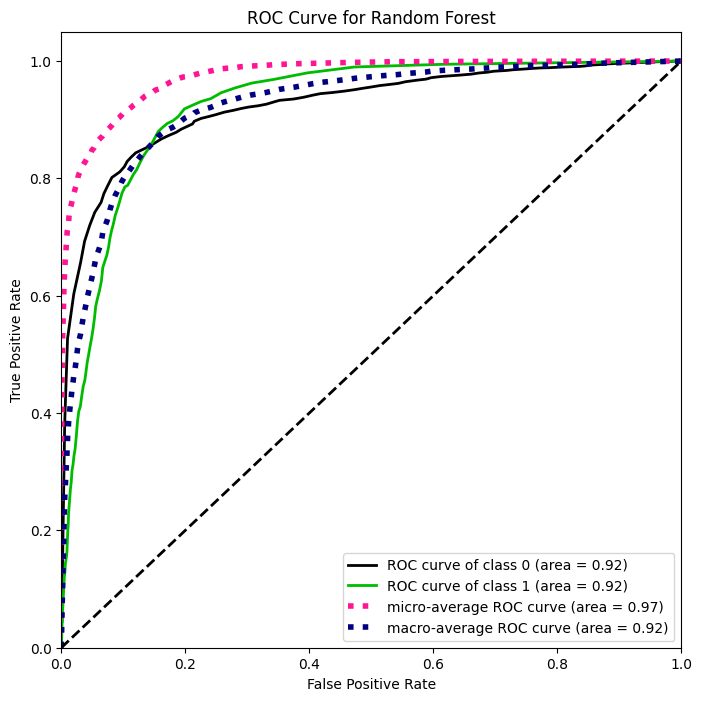

In [ ]:
# ROC Curve

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for Random Forest")
plt.show()

In [ ]:
# 4.8.1	Initialize and train a Gradient Boosting Ensemble

graBoosting = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
graBoosting.fit(X_train, y_train)
preds = graBoosting.predict(X_test)

print("gradientboosting: ", accuracy_score(y_test, preds))

gradientboosting:  0.9062006527002843


In [ ]:
from sklearn.metrics import classification_report
predicted_probas = graBoosting.predict_proba(X_test)

print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8408
           1       0.66      0.38      0.48      1091

    accuracy                           0.91      9499
   macro avg       0.79      0.68      0.72      9499
weighted avg       0.89      0.91      0.90      9499



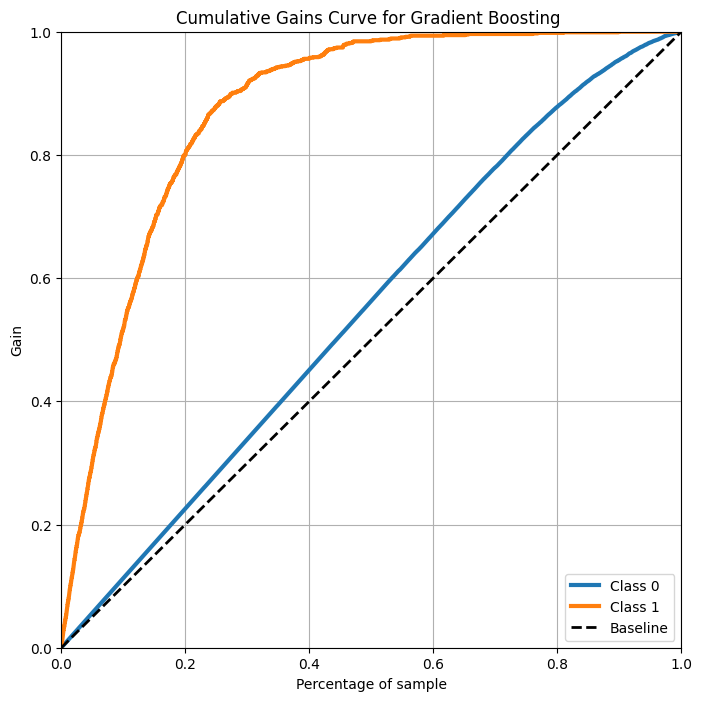

In [ ]:
# 4.8.2 Cumulative Lift Chart

skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8),
                                   title="Cumulative Gains Curve for Gradient Boosting ")
plt.show()

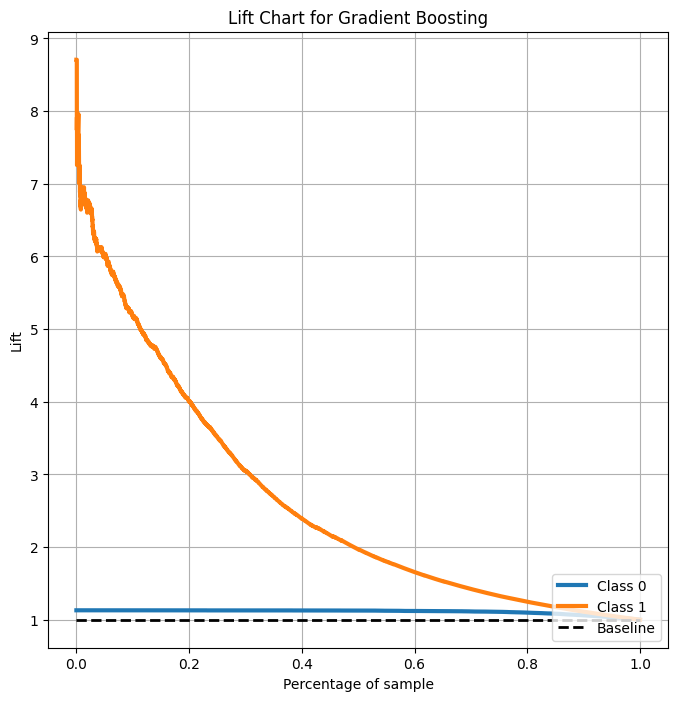

In [ ]:
# Lift Chart

skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8), title="Lift Chart for Gradient Boosting")
plt.show()

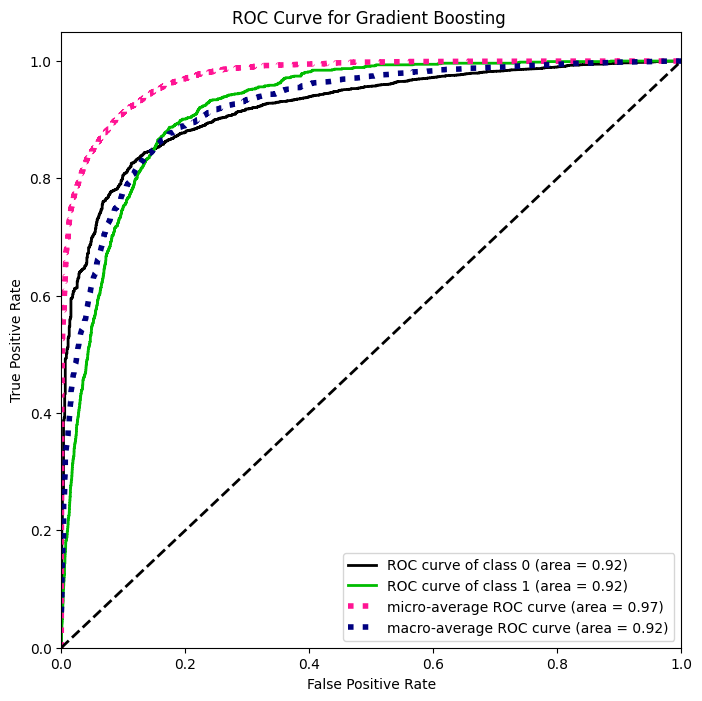

In [ ]:
# ROC Curve

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for Gradient Boosting ")
plt.show()

In [ ]:
# 4.9.1

from pprint import pprint

print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Create a parameter grid
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_features': [3, 5, 7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 1000]
}

In [ ]:
# 4.9.2 and # 4.9.3

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                         cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits


{'bootstrap': True,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
# 4.9.4

rf = RandomForestClassifier(**grid_search.best_params_)

model = rf.fit(X_train, y_train)

preds = model.predict(X_test)

print("randomforest: ", accuracy_score(y_test, preds))

randomforest:  0.9057795557427097


In [ ]:
# 4.9.5

from sklearn.metrics import classification_report

print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8408
           1       0.63      0.44      0.52      1091

    accuracy                           0.91      9499
   macro avg       0.78      0.70      0.73      9499
weighted avg       0.90      0.91      0.90      9499



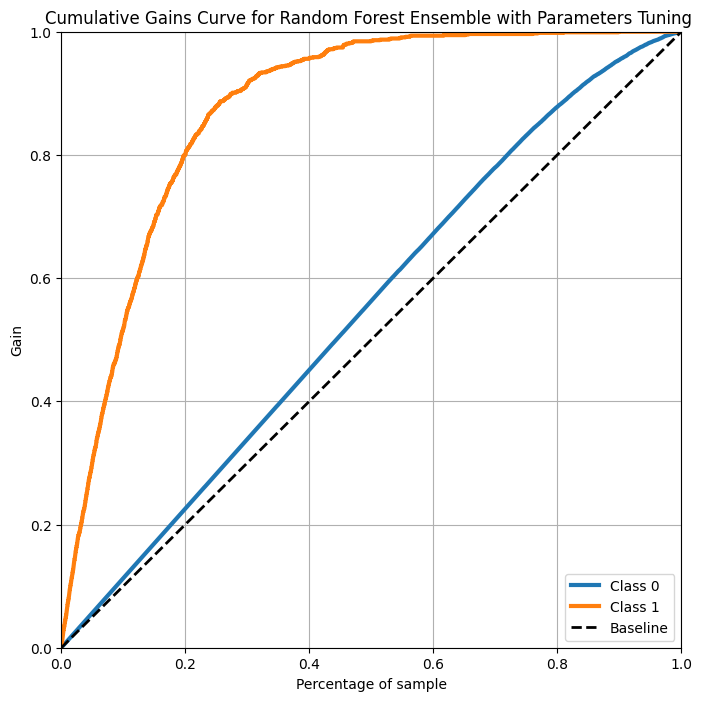

In [ ]:
# 4.9.6 Cumulative lift chart

skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8),
                                   title="Cumulative Gains Curve for Random Forest Ensemble with Parameters Tuning ")
plt.show()

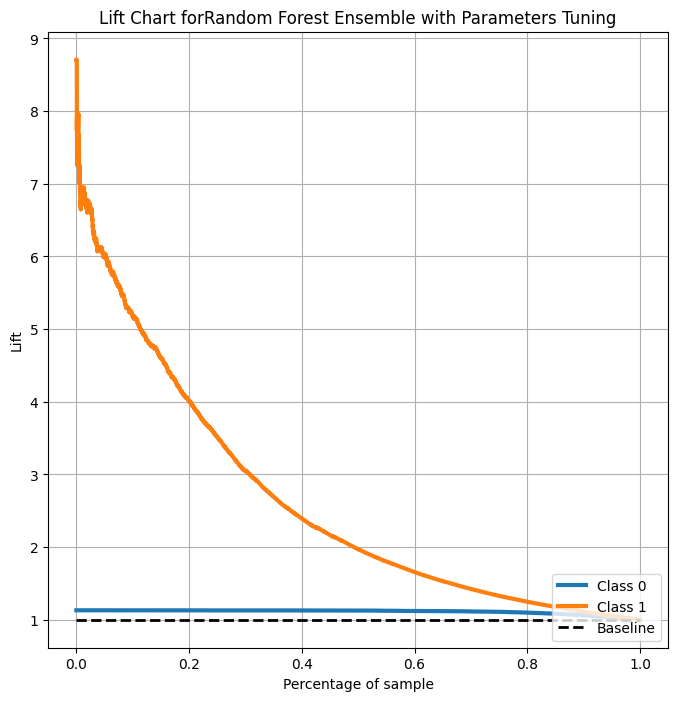

In [ ]:
# Lift Chart

skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8), title="Lift Chart forRandom Forest Ensemble with Parameters Tuning")
plt.show()

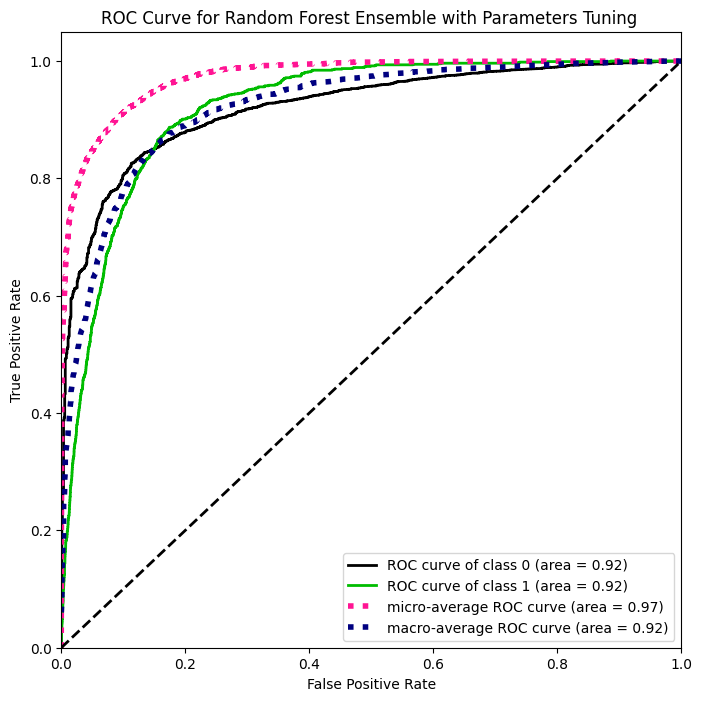

In [ ]:
# ROC curve

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for Random Forest Ensemble with Parameters Tuning ")
plt.show()